✅ All libraries imported successfully!


          CLAUSE CLASSIFICATION AND RISK SCORING
               With Enhanced Feature Engineering

PHASE 1: MODEL TRAINING
----------------------------------------------------------------------
🔧 Enhanced Clause Risk Classifier initialized
   📋 Tracking 32 high-risk keywords
TRAINING ENHANCED CLAUSE RISK CLASSIFIER

[1/7] Loading CUAD dataset...


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/13155 [00:00<?, ? examples/s]

   ✅ Loaded 7192 clauses

   Risk Distribution:
risk_level
Low       3835
High      1792
Medium    1565
Name: count, dtype: int64

[2/7] Preprocessing text...

[3/7] Extracting multi-modal features...
   ├─ TF-IDF text features
   ├─ Keyword features (penalty, breach, etc.)
   ├─ Length features (char count, word count)
   └─ Clause type features
   Total feature dimensions: 1022

[4/7] Splitting data (80% train, 20% test)...
   Training samples: 5753
   Testing samples: 1439

[5/7] Training Decision Tree (Baseline)...
   ✅ Decision Tree trained

   Decision Tree Results:
   Accuracy: 0.7116

[6/7] Training Random Forest (Improved)...
   ✅ Random Forest trained with 200 trees

   Random Forest Results:
   Accuracy: 0.7408

[7/7] Model Comparison:
   Decision Tree Accuracy: 0.7116 (71.16%)
   Random Forest Accuracy: 0.7408 (74.08%)
   Improvement: 2.92%

[SAVING] Saving models to models/...
   ✅ Models saved to models/

✅ TRAINING COMPLETE!


PHASE 2: TESTING ON SAMPLE CLAUSES
---------

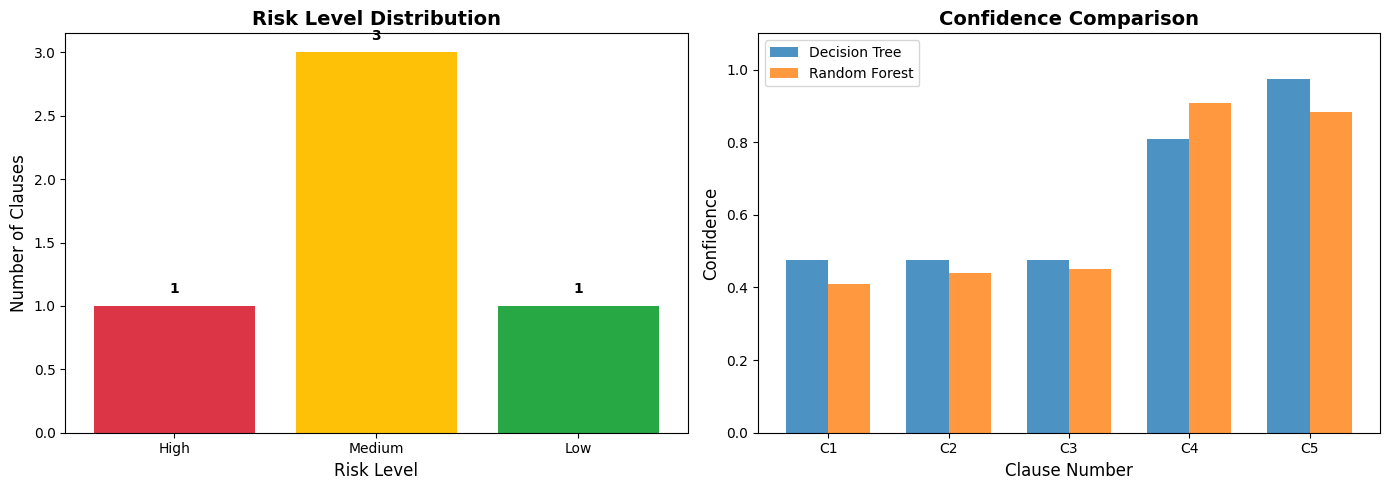

   ✅ Charts saved to 'risk_analysis_charts.png'

2. Creating feature importance chart...


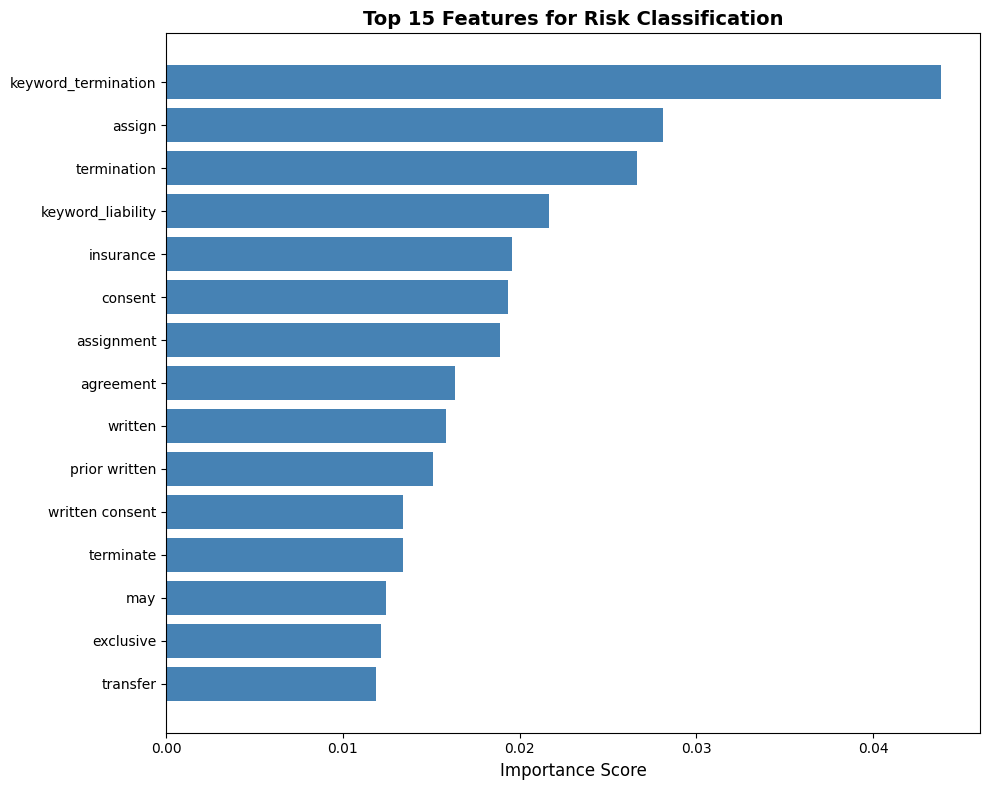

✅ Feature importance plot saved


✅ COMPLETE PIPELINE EXECUTION FINISHED!

📊 Final Summary:
   • Models Trained: Decision Tree + Random Forest
   • Decision Tree Accuracy: 71.16%
   • Random Forest Accuracy: 74.08%
   • Clauses Analyzed: 5
   • High Risk Identified: 1
   • Medium Risk: 3
   • Low Risk: 1

📁 Files Generated:
   ✓ models/decision_tree_model.pkl
   ✓ models/random_forest_model.pkl
   ✓ models/tfidf_vectorizer.pkl
   ✓ models/metadata.json
   ✓ frontend_output.json
   ✓ risk_summary_table.csv
   ✓ risk_analysis_charts.png
   ✓ feature_importance.png

🔗 Next Steps in Pipeline:
   1. ✅ Clause Extraction (LegalBERT) - COMPLETE
   2. ✅ Risk Classification (Your Module) - COMPLETE
   3. ➡️  Legal Section Mapping (IPC/BNS) - Ready for 1 high-risk clauses
   4. ➡️  Database Storage - JSON ready
   5. ➡️  PDF Report Generation - Data ready


In [1]:
"""
=============================================================================
CLAUSE CLASSIFICATION AND RISK SCORING
Final Year Project - Legal Document Analysis System
=============================================================================

TECHNIQUE: Multi-Feature Risk Classification
- Keywords (e.g., "penalty", "breach")
- Clause Length
- Clause Type
- Decision Tree & Random Forest Models
- Color-coded output for frontend

 Classify extracted legal clauses into risk levels (High/Medium/Low)
Data Preprocessing → LegalBERT Extraction → [YOUR MODULE] → Legal Mapping
=============================================================================
"""

# =============================================================================
# IMPORTS
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib
import re
import json
from datetime import datetime
from typing import List, Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

from datasets import load_dataset
import nltk

print("✅ All libraries imported successfully!\n")


# =============================================================================
# ENHANCED CLAUSE RISK CLASSIFIER WITH MULTI-FEATURE ENGINEERING
# =============================================================================

class EnhancedClauseRiskClassifier:
    """
    Advanced classifier using multiple features:
    1. TF-IDF text features
    2. High-risk keywords (penalty, breach, liability, etc.)
    3. Clause length (character and word count)
    4. Clause type (from LegalBERT)

    Models: Decision Tree (baseline) + Random Forest (improved)
    Output: Risk level with color codes for frontend
    """

    def __init__(self):
        """Initialize the classifier"""
        self.vectorizer = None
        self.dt_model = None  # Decision Tree
        self.rf_model = None  # Random Forest
        self.scaler = None
        self.stop_words = None
        self.risk_mapping = None
        self.high_risk_keywords = None
        self.is_trained = False

        # Define high-risk keywords as per project description
        self.high_risk_keywords = {
            'liability': ['liable', 'liability', 'indemnify', 'indemnification'],
            'damages': ['damages', 'consequential', 'indirect', 'punitive'],
            'penalty': ['penalty', 'penalties', 'liquidated', 'forfeit'],
            'breach': ['breach', 'default', 'violation', 'non-compliance'],
            'termination': ['terminate', 'termination', 'cancel', 'cancellation'],
            'unlimited': ['unlimited', 'uncapped', 'unrestricted', 'unilateral'],
            'waiver': ['waive', 'waiver', 'relinquish', 'surrender'],
            'exclusive': ['exclusive', 'exclusivity', 'non-compete', 'sole']
        }

        # Color codes for frontend display
        self.color_codes = {
            'High': '#dc3545',    # Red
            'Medium': '#ffc107',  # Orange/Yellow
            'Low': '#28a745'      # Green
        }

        print("🔧 Enhanced Clause Risk Classifier initialized")
        print(f"   📋 Tracking {sum(len(v) for v in self.high_risk_keywords.values())} high-risk keywords")

    # =========================================================================
    # FEATURE ENGINEERING METHODS
    # =========================================================================

    def _extract_keyword_features(self, text: str) -> Dict[str, int]:
        """
        Extract keyword-based features
        Counts occurrences of high-risk keywords

        Args:
            text: Clause text

        Returns:
            Dictionary with keyword counts for each category
        """
        text_lower = text.lower()
        features = {}

        for category, keywords in self.high_risk_keywords.items():
            count = sum(text_lower.count(keyword) for keyword in keywords)
            features[f'keyword_{category}'] = count

        return features

    def _extract_length_features(self, text: str) -> Dict[str, int]:
        """
        Extract clause length features

        Args:
            text: Clause text

        Returns:
            Dictionary with length metrics
        """
        return {
            'char_count': len(text),
            'word_count': len(text.split()),
            'sentence_count': len(re.split(r'[.!?]+', text)),
            'avg_word_length': np.mean([len(word) for word in text.split()]) if text.split() else 0
        }

    def _extract_clause_type_features(self, clause_type: str) -> Dict[str, int]:
        """
        Extract clause type features
        One-hot encoding of clause types

        Args:
            clause_type: Type of clause (from LegalBERT)

        Returns:
            Dictionary with one-hot encoded clause type
        """
        # Common clause types
        clause_types = [
            'Limitation of Liability', 'Confidentiality', 'Payment Terms',
            'Termination', 'Non-Compete', 'Indemnification', 'Warranty',
            'Governing Law', 'Insurance', 'Audit Rights'
        ]

        features = {}
        for ctype in clause_types:
            features[f'type_{ctype.lower().replace(" ", "_")}'] = 1 if clause_type == ctype else 0

        return features

    def _extract_all_features(self, text: str, clause_type: str = None) -> pd.DataFrame:
        """
        Combine all feature types into a feature vector

        Features include:
        1. TF-IDF text features (1000 dimensions)
        2. Keyword features (8 dimensions)
        3. Length features (4 dimensions)
        4. Clause type features (10 dimensions)

        Total: ~1022 features

        Args:
            text: Clause text
            clause_type: Optional clause type

        Returns:
            Feature dataframe
        """
        features = {}

        # 1. Keyword features
        keyword_feats = self._extract_keyword_features(text)
        features.update(keyword_feats)

        # 2. Length features
        length_feats = self._extract_length_features(text)
        features.update(length_feats)

        # 3. Clause type features
        if clause_type:
            type_feats = self._extract_clause_type_features(clause_type)
            features.update(type_feats)

        return pd.DataFrame([features])

    # =========================================================================
    # TRAINING METHODS
    # =========================================================================

    def train(self, save_path='models/'):
        """
        Complete training pipeline with multi-feature approach

        Steps:
        1. Load CUAD dataset
        2. Extract ALL features (TF-IDF + keywords + length + type)
        3. Train Decision Tree (baseline)
        4. Train Random Forest (improved)
        5. Compare models
        6. Save best model
        """
        print("="*70)
        print("TRAINING ENHANCED CLAUSE RISK CLASSIFIER")
        print("="*70)

        # Step 1: Load dataset
        print("\n[1/7] Loading CUAD dataset...")
        df = self._load_cuad_dataset()

        # Step 2: Text preprocessing
        print("\n[2/7] Preprocessing text...")
        df['clean_text'] = df['text'].apply(self._clean_text)

        # Step 3: Extract multi-modal features
        print("\n[3/7] Extracting multi-modal features...")
        print("   ├─ TF-IDF text features")
        print("   ├─ Keyword features (penalty, breach, etc.)")
        print("   ├─ Length features (char count, word count)")
        print("   └─ Clause type features")

        X_tfidf, y = self._extract_tfidf_features(df)
        X_manual = self._extract_manual_features(df)

        # Combine TF-IDF and manual features
        from scipy.sparse import hstack
        X_combined = hstack([X_tfidf, X_manual])

        print(f"   Total feature dimensions: {X_combined.shape[1]}")

        # Step 4: Split data
        print("\n[4/7] Splitting data (80% train, 20% test)...")
        X_train, X_test, y_train, y_test = train_test_split(
            X_combined, y, test_size=0.2, random_state=42, stratify=y
        )
        print(f"   Training samples: {X_train.shape[0]}")
        print(f"   Testing samples: {X_test.shape[0]}")

        # Step 5: Train Decision Tree (as per your description)
        print("\n[5/7] Training Decision Tree (Baseline)...")
        self._train_decision_tree(X_train, y_train)
        dt_accuracy = self._evaluate_model(self.dt_model, X_test, y_test, "Decision Tree")

        # Step 6: Train Random Forest (Improved)
        print("\n[6/7] Training Random Forest (Improved)...")
        self._train_random_forest(X_train, y_train)
        rf_accuracy = self._evaluate_model(self.rf_model, X_test, y_test, "Random Forest")

        # Step 7: Model comparison
        print("\n[7/7] Model Comparison:")
        print(f"   Decision Tree Accuracy: {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")
        print(f"   Random Forest Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
        print(f"   Improvement: {(rf_accuracy - dt_accuracy)*100:.2f}%")

        # Save models
        print(f"\n[SAVING] Saving models to {save_path}...")
        self.save_model(save_path)

        self.is_trained = True

        print("\n" + "="*70)
        print("✅ TRAINING COMPLETE!")
        print("="*70)

        return dt_accuracy, rf_accuracy

    def _load_cuad_dataset(self) -> pd.DataFrame:
        """Load and prepare CUAD dataset"""
        try:
            nltk.download('stopwords', quiet=True)
            from nltk.corpus import stopwords
            self.stop_words = set(stopwords.words('english'))
        except:
            self.stop_words = set()

        print("   Downloading CUAD dataset...")
        data = load_dataset("dvgodoy/CUAD_v1_Contract_Understanding_clause_classification")

        # Risk mapping
        self.risk_mapping = {
            # HIGH RISK
            'Limitation of Liability': 'High',
            'Uncapped Liability': 'High',
            'Termination For Convenience': 'High',
            'Change Of Control': 'High',
            'Anti-Assignment': 'High',
            'Irrevocable Or Perpetual License': 'High',
            'Post-Termination Services': 'High',
            'Unlimited/All-You-Can-Eat-License': 'High',

            # MEDIUM RISK
            'Confidentiality': 'Medium',
            'Non-Compete': 'Medium',
            'Exclusivity': 'Medium',
            'No-Solicit Of Customers': 'Medium',
            'No-Solicit Of Employees': 'Medium',
            'IP Ownership Assignment': 'Medium',
            'Most Favored Nation': 'Medium',
            'Revenue/Profit Sharing': 'Medium',
            'Third Party Beneficiary': 'Medium',
            'Rofr/Rofo/Rofn': 'Medium',
            'Joint IP Ownership': 'Medium',

            # LOW RISK
            'Audit Rights': 'Low',
            'Governing Law': 'Low',
            'Warranty Duration': 'Low',
            'Insurance': 'Low',
            'License Grant': 'Low',
            'Cap On Liability': 'Low',
            'Liquidated Damages': 'Low',
            'Minimum Commitment': 'Low',
            'Volume Restriction': 'Low',
            'Price Restrictions': 'Low'
        }

        # Create dataset
        records = []
        for doc in data['train']:
            if doc['label'] in self.risk_mapping:
                records.append({
                    'text': doc['clause'],
                    'clause_type': doc['label'],
                    'risk_level': self.risk_mapping[doc['label']]
                })

        df = pd.DataFrame(records)
        print(f"   ✅ Loaded {len(df)} clauses")
        print(f"\n   Risk Distribution:")
        print(df['risk_level'].value_counts())

        return df

    def _clean_text(self, text: str) -> str:
        """Preprocess text"""
        text = re.sub(r'[^a-zA-Z\s]', '', str(text))
        text = text.lower()
        if self.stop_words:
            words = [w for w in text.split() if w not in self.stop_words and len(w) > 2]
        else:
            words = [w for w in text.split() if len(w) > 2]
        return ' '.join(words)

    def _extract_tfidf_features(self, df: pd.DataFrame) -> Tuple:
        """Extract TF-IDF features"""
        self.vectorizer = TfidfVectorizer(
            max_features=1000,
            min_df=2,
            max_df=0.8,
            ngram_range=(1, 3),
            sublinear_tf=True
        )

        X = self.vectorizer.fit_transform(df['clean_text'])
        y = df['risk_level']

        return X, y

    def _extract_manual_features(self, df: pd.DataFrame) -> np.ndarray:
        """Extract keyword + length + type features"""
        manual_features = []

        for idx, row in df.iterrows():
            # Keyword features
            keyword_feats = self._extract_keyword_features(row['text'])

            # Length features
            length_feats = self._extract_length_features(row['text'])

            # Clause type features
            type_feats = self._extract_clause_type_features(row['clause_type'])

            # Combine all
            all_feats = {**keyword_feats, **length_feats, **type_feats}
            manual_features.append(list(all_feats.values()))

        return np.array(manual_features)

    def _train_decision_tree(self, X_train, y_train):
        """Train Decision Tree model"""
        self.dt_model = DecisionTreeClassifier(
            max_depth=10,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42
        )
        self.dt_model.fit(X_train, y_train)
        print("   ✅ Decision Tree trained")

    def _train_random_forest(self, X_train, y_train):
        """Train Random Forest model"""
        self.rf_model = RandomForestClassifier(
            n_estimators=200,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        )
        self.rf_model.fit(X_train, y_train)
        print("   ✅ Random Forest trained with 200 trees")

    def _evaluate_model(self, model, X_test, y_test, model_name: str) -> float:
        """Evaluate model performance"""
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print(f"\n   {model_name} Results:")
        print(f"   Accuracy: {accuracy:.4f}")

        return accuracy

    # =========================================================================
    # INFERENCE METHODS - YOUR PIPELINE API
    # =========================================================================

    def classify(self, clause_text: str, clause_type: str = None,
                 use_model: str = 'random_forest') -> Dict:
        """
        Classify a single clause with enhanced features

        THIS IS YOUR MAIN API FOR PIPELINE INTEGRATION

        Args:
            clause_text: The clause text to classify
            clause_type: Optional clause type from LegalBERT
            use_model: 'decision_tree' or 'random_forest'

        Returns:
            {
                'clause_text': Original text,
                'risk_level': 'High'/'Medium'/'Low',
                'risk_score': 1-3,
                'confidence': 0.0-1.0,
                'color_code': '#hex_color',
                'feature_analysis': {
                    'keyword_flags': {...},
                    'length_metrics': {...}
                },
                'model_used': 'decision_tree' or 'random_forest'
            }
        """
        if not self.is_trained:
            raise ValueError("❌ Model not trained! Call train() first.")

        # Choose model
        model = self.rf_model if use_model == 'random_forest' else self.dt_model

        # Extract TF-IDF features
        clean_text = self._clean_text(clause_text)
        X_tfidf = self.vectorizer.transform([clean_text])

        # Extract manual features
        keyword_feats = self._extract_keyword_features(clause_text)
        length_feats = self._extract_length_features(clause_text)

        if clause_type:
            type_feats = self._extract_clause_type_features(clause_type)
        else:
            type_feats = {f'type_{t}': 0 for t in [
                'limitation_of_liability', 'confidentiality', 'payment_terms',
                'termination', 'non_compete', 'indemnification', 'warranty',
                'governing_law', 'insurance', 'audit_rights'
            ]}

        # Combine features
        manual_feats = {**keyword_feats, **length_feats, **type_feats}
        X_manual = np.array([list(manual_feats.values())])

        # Combine TF-IDF and manual
        from scipy.sparse import hstack
        X_combined = hstack([X_tfidf, X_manual])

        # Predict
        risk_level = model.predict(X_combined)[0]
        probabilities = model.predict_proba(X_combined)[0]
        confidence = float(probabilities.max())

        # Build probability distribution
        prob_dict = {}
        for i, label in enumerate(model.classes_):
            prob_dict[label] = float(probabilities[i])

        # Risk score mapping
        risk_score_map = {'Low': 1, 'Medium': 2, 'High': 3}

        # Keyword flags (for explanation)
        keyword_flags = {k: v for k, v in keyword_feats.items() if v > 0}

        # Build result with frontend-ready data
        result = {
            'clause_text': clause_text,
            'clause_type': clause_type,
            'risk_level': risk_level,
            'risk_score': risk_score_map[risk_level],
            'confidence': confidence,
            'probabilities': prob_dict,
            'color_code': self.color_codes[risk_level],  # For frontend
            'feature_analysis': {
                'keyword_flags': keyword_flags,
                'length_metrics': length_feats,
                'total_keywords_found': sum(keyword_feats.values())
            },
            'model_used': use_model,
            'timestamp': datetime.now().isoformat()
        }

        return result

    def classify_batch(self, clauses: List[Dict],
                       use_model: str = 'random_forest') -> List[Dict]:
        """
        Classify multiple clauses

        Args:
            clauses: List of dicts with 'text' and optional 'type' keys
            use_model: 'decision_tree' or 'random_forest'

        Returns:
            List of classification results
        """
        results = []

        for clause in clauses:
            clause_text = clause.get('text', clause.get('clause_text', ''))
            clause_type = clause.get('type', clause.get('clause_type', None))

            result = self.classify(clause_text, clause_type, use_model)

            # Add clause ID if present
            if 'clause_id' in clause:
                result['clause_id'] = clause['clause_id']

            results.append(result)

        return results

    # =========================================================================
    # MODEL PERSISTENCE
    # =========================================================================

    def save_model(self, path='models/'):
        """Save all models and components"""
        import os
        os.makedirs(path, exist_ok=True)

        # Save models
        joblib.dump(self.dt_model, f'{path}decision_tree_model.pkl')
        joblib.dump(self.rf_model, f'{path}random_forest_model.pkl')
        joblib.dump(self.vectorizer, f'{path}tfidf_vectorizer.pkl')

        # Save metadata
        metadata = {
            'risk_mapping': self.risk_mapping,
            'high_risk_keywords': self.high_risk_keywords,
            'color_codes': self.color_codes,
            'is_trained': self.is_trained,
            'training_date': datetime.now().isoformat()
        }

        with open(f'{path}metadata.json', 'w') as f:
            json.dump(metadata, f, indent=2)

        print(f"   ✅ Models saved to {path}")

    def load_model(self, path='models/'):
        """Load trained models"""
        self.dt_model = joblib.load(f'{path}decision_tree_model.pkl')
        self.rf_model = joblib.load(f'{path}random_forest_model.pkl')
        self.vectorizer = joblib.load(f'{path}tfidf_vectorizer.pkl')

        with open(f'{path}metadata.json', 'r') as f:
            metadata = json.load(f)

        self.risk_mapping = metadata['risk_mapping']
        self.high_risk_keywords = metadata['high_risk_keywords']
        self.color_codes = metadata['color_codes']
        self.is_trained = metadata['is_trained']

        print(f"✅ Models loaded from {path}")


# =============================================================================
# VISUALIZATION FUNCTIONS
# =============================================================================

def plot_feature_importance(classifier, top_n=15):
    """Plot top features from Random Forest"""
    if not classifier.rf_model:
        print("❌ Random Forest model not trained")
        return

    # Get feature names
    feature_names = []

    # TF-IDF features
    if classifier.vectorizer:
        feature_names.extend(classifier.vectorizer.get_feature_names_out())

    # Manual features
    for category in classifier.high_risk_keywords.keys():
        feature_names.append(f'keyword_{category}')

    feature_names.extend(['char_count', 'word_count', 'sentence_count', 'avg_word_length'])

    # Get importance
    importances = classifier.rf_model.feature_importances_[:len(feature_names)]

    # Sort and get top N
    indices = np.argsort(importances)[-top_n:]
    top_features = [feature_names[i] for i in indices]
    top_importances = importances[indices]

    # Plot
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(top_importances)), top_importances, color='steelblue')
    plt.yticks(range(len(top_importances)), top_features)
    plt.xlabel('Importance Score', fontsize=12)
    plt.title(f'Top {top_n} Features for Risk Classification', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Feature importance plot saved")


def create_risk_summary_table(results: List[Dict]) -> pd.DataFrame:
    """Create a summary table for frontend display"""
    summary_data = []

    for result in results:
        summary_data.append({
            'Clause': result['clause_text'][:80] + '...',
            'Risk Level': result['risk_level'],
            'Risk Score': result['risk_score'],
            'Confidence': f"{result['confidence']:.2%}",
            'Keywords Found': result['feature_analysis']['total_keywords_found'],
            'Length (words)': result['feature_analysis']['length_metrics']['word_count'],
            'Color': result['color_code']
        })

    df = pd.DataFrame(summary_data)
    return df


# =============================================================================
# COMPLETE PIPELINE EXAMPLE
# =============================================================================

def run_complete_pipeline():
    """Complete demonstration of the system"""

    print("\n" + "="*70)
    print(" "*10 + "CLAUSE CLASSIFICATION AND RISK SCORING")
    print(" "*15 + "With Enhanced Feature Engineering")
    print("="*70 + "\n")

    # =========================================================================
    # PHASE 1: TRAINING
    # =========================================================================

    print("PHASE 1: MODEL TRAINING")
    print("-"*70)

    classifier = EnhancedClauseRiskClassifier()
    dt_acc, rf_acc = classifier.train(save_path='models/')

    # =========================================================================
    # PHASE 2: TESTING
    # =========================================================================

    print("\n\nPHASE 2: TESTING ON SAMPLE CLAUSES")
    print("-"*70)

    # Test clauses with different risk levels
    test_clauses = [
        {
            'text': '2. RIGHTS GRANTED 3.1 For the duration of the Services Period and subject to Your payment obligations , and except as otherwise set forth in this Agreement or Your order, You have the non -exclusive, non- assignable, royalty free, worldwide limited right to access and use the Services that You ordered, including anything developed by Oracle and delivered to You as part of the Services, solely for Your internal Cloud_CSA_Transactional_v090213_ IN Page 2 of 12 business operations and subject to the terms of this Agreement and Your order, including the Service Specifications. ',
            'type': 'Limitation of Liability'
        },
        {
            'text': 'All confidential information disclosed under this agreement must be kept confidential for a period of five years from the date of disclosure',
            'type': 'Confidentiality'
        },
        {
            'text': 'Payment shall be made within thirty days of receipt of invoice by bank transfer to the account specified',
            'type': 'Payment Terms'
        },
        {
            'text': 'Either party may terminate this agreement at any time without cause upon thirty days written notice with immediate forfeiture of all penalty amounts',
            'type': 'Termination'
        },
        {
            'text': 'The contractor shall maintain professional liability insurance coverage of at least ten million rupees throughout the term',
            'type': 'Insurance'
        }
    ]

    print(f"\nClassifying {len(test_clauses)} clauses using Random Forest...\n")

    results = classifier.classify_batch(test_clauses, use_model='random_forest')

    # Display detailed results
    for i, result in enumerate(results, 1):
        print(f"\n{'='*70}")
        print(f"CLAUSE {i}")
        print(f"{'='*70}")
        print(f"Text: {result['clause_text'][:100]}...")
        print(f"Type: {result['clause_type']}")
        print(f"\n🎯 CLASSIFICATION RESULT:")
        print(f"   Risk Level: {result['risk_level']}")
        print(f"   Risk Score: {result['risk_score']}/3")
        print(f"   Confidence: {result['confidence']:.2%}")
        print(f"   Color Code: {result['color_code']}")

        print(f"\n📊 FEATURE ANALYSIS:")
        print(f"   Keywords Detected: {result['feature_analysis']['total_keywords_found']}")
        if result['feature_analysis']['keyword_flags']:
            print(f"   Keyword Categories:")
            for k, v in result['feature_analysis']['keyword_flags'].items():
                print(f"      • {k}: {v} occurrence(s)")

        print(f"   Length Metrics:")
        print(f"      • Character count: {result['feature_analysis']['length_metrics']['char_count']}")
        print(f"      • Word count: {result['feature_analysis']['length_metrics']['word_count']}")
        print(f"      • Sentence count: {result['feature_analysis']['length_metrics']['sentence_count']}")

        print(f"\n📈 PROBABILITY DISTRIBUTION:")
        for level, prob in result['probabilities'].items():
            bar_length = int(prob * 30)
            print(f"   {level:8s}: {'█' * bar_length} {prob:.2%}")

    # =========================================================================
    # PHASE 3: COMPARISON WITH DECISION TREE
    # =========================================================================

    print("\n\n" + "="*70)
    print("PHASE 3: MODEL COMPARISON (Decision Tree vs Random Forest)")
    print("="*70)

    dt_results = classifier.classify_batch(test_clauses, use_model='decision_tree')

    comparison_df = pd.DataFrame({
        'Clause': [r['clause_text'][:50] + '...' for r in results],
        'DT Risk': [r['risk_level'] for r in dt_results],
        'DT Conf': [f"{r['confidence']:.2%}" for r in dt_results],
        'RF Risk': [r['risk_level'] for r in results],
        'RF Conf': [f"{r['confidence']:.2%}" for r in results],
        'Agreement': ['✓' if dt_results[i]['risk_level'] == results[i]['risk_level'] else '✗'
                      for i in range(len(results))]
    })

    print("\n" + comparison_df.to_string(index=False))

    agreement_rate = sum(1 for i in range(len(results))
                         if dt_results[i]['risk_level'] == results[i]['risk_level']) / len(results)

    print(f"\n📊 Model Agreement Rate: {agreement_rate:.2%}")
    print(f"   Decision Tree Avg Confidence: {np.mean([r['confidence'] for r in dt_results]):.2%}")
    print(f"   Random Forest Avg Confidence: {np.mean([r['confidence'] for r in results]):.2%}")

    # =========================================================================
    # PHASE 4: SUMMARY STATISTICS
    # =========================================================================

    print("\n\n" + "="*70)
    print("PHASE 4: RISK SUMMARY & STATISTICS")
    print("="*70)

    risk_counts = {'High': 0, 'Medium': 0, 'Low': 0}
    for result in results:
        risk_counts[result['risk_level']] += 1

    print(f"\n🎯 Risk Distribution (Random Forest):")
    print(f"   🔴 High Risk:   {risk_counts['High']} clause(s) ({risk_counts['High']/len(results)*100:.1f}%)")
    print(f"   🟡 Medium Risk: {risk_counts['Medium']} clause(s) ({risk_counts['Medium']/len(results)*100:.1f}%)")
    print(f"   🟢 Low Risk:    {risk_counts['Low']} clause(s) ({risk_counts['Low']/len(results)*100:.1f}%)")

    # High-risk clause details
    high_risk_clauses = [r for r in results if r['risk_level'] == 'High']

    if high_risk_clauses:
        print(f"\n🚨 HIGH-RISK CLAUSES IDENTIFIED: {len(high_risk_clauses)}")
        print("   These require immediate attention and will be sent to Legal Mapping:")

        for idx, clause in enumerate(high_risk_clauses, 1):
            print(f"\n   {idx}. {clause['clause_text'][:70]}...")
            print(f"      Risk Score: {clause['risk_score']}/3")
            print(f"      Confidence: {clause['confidence']:.2%}")
            print(f"      Keywords: {clause['feature_analysis']['total_keywords_found']} found")
            if clause['feature_analysis']['keyword_flags']:
                flags = ', '.join(k.replace('keyword_', '')
                                 for k in clause['feature_analysis']['keyword_flags'].keys())
                print(f"      Categories: {flags}")

    # =========================================================================
    # PHASE 5: FRONTEND-READY OUTPUT
    # =========================================================================

    print("\n\n" + "="*70)
    print("PHASE 5: FRONTEND-READY JSON OUTPUT")
    print("="*70)

    # Format for frontend display
    frontend_output = {
        'document_id': 'DOC_12345',
        'analysis_timestamp': datetime.now().isoformat(),
        'model_info': {
            'decision_tree_accuracy': f"{dt_acc:.2%}",
            'random_forest_accuracy': f"{rf_acc:.2%}",
            'model_used': 'random_forest'
        },
        'summary': {
            'total_clauses': len(results),
            'risk_distribution': risk_counts,
            'high_risk_count': risk_counts['High'],
            'average_confidence': f"{np.mean([r['confidence'] for r in results]):.2%}"
        },
        'classified_clauses': [
            {
                'clause_id': f"CLS_{i+1:03d}",
                'text': r['clause_text'],
                'type': r['clause_type'],
                'risk': {
                    'level': r['risk_level'],
                    'score': r['risk_score'],
                    'confidence': r['confidence'],
                    'color': r['color_code']
                },
                'features': {
                    'keywords_found': r['feature_analysis']['total_keywords_found'],
                    'word_count': r['feature_analysis']['length_metrics']['word_count'],
                    'char_count': r['feature_analysis']['length_metrics']['char_count']
                },
                'requires_legal_mapping': r['risk_level'] in ['High', 'Medium']
            }
            for i, r in enumerate(results)
        ],
        'high_risk_clauses': [
            {
                'clause_id': f"CLS_{results.index(r)+1:03d}",
                'text': r['clause_text'],
                'risk_score': r['risk_score'],
                'confidence': r['confidence']
            }
            for r in high_risk_clauses
        ]
    }

    print("\nSample JSON structure for frontend:")
    print(json.dumps(frontend_output, indent=2, default=str)[:1000] + "\n...")

    # Save to file
    with open('frontend_output.json', 'w') as f:
        json.dump(frontend_output, f, indent=2, default=str)

    print("\n✅ Complete output saved to 'frontend_output.json'")

    # =========================================================================
    # PHASE 6: CREATE SUMMARY TABLE
    # =========================================================================

    print("\n\n" + "="*70)
    print("PHASE 6: SUMMARY TABLE FOR DOCUMENTATION")
    print("="*70)

    summary_table = create_risk_summary_table(results)
    print("\n" + summary_table.to_string(index=False))

    summary_table.to_csv('risk_summary_table.csv', index=False)
    print("\n✅ Summary table saved to 'risk_summary_table.csv'")

    # =========================================================================
    # PHASE 7: VISUALIZATIONS
    # =========================================================================

    print("\n\n" + "="*70)
    print("PHASE 7: GENERATING VISUALIZATIONS")
    print("="*70)

    # Risk distribution chart
    print("\n1. Creating risk distribution chart...")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Chart 1: Risk distribution
    colors_list = [classifier.color_codes[k] for k in risk_counts.keys()]
    ax1.bar(risk_counts.keys(), risk_counts.values(), color=colors_list)
    ax1.set_title('Risk Level Distribution', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Risk Level', fontsize=12)
    ax1.set_ylabel('Number of Clauses', fontsize=12)
    for i, (k, v) in enumerate(risk_counts.items()):
        ax1.text(i, v + 0.1, str(v), ha='center', fontweight='bold')

    # Chart 2: Confidence comparison
    dt_conf = [r['confidence'] for r in dt_results]
    rf_conf = [r['confidence'] for r in results]

    x_pos = np.arange(len(results))
    width = 0.35

    ax2.bar(x_pos - width/2, dt_conf, width, label='Decision Tree', alpha=0.8)
    ax2.bar(x_pos + width/2, rf_conf, width, label='Random Forest', alpha=0.8)
    ax2.set_title('Confidence Comparison', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Clause Number', fontsize=12)
    ax2.set_ylabel('Confidence', fontsize=12)
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels([f'C{i+1}' for i in range(len(results))])
    ax2.legend()
    ax2.set_ylim(0, 1.1)

    plt.tight_layout()
    plt.savefig('risk_analysis_charts.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("   ✅ Charts saved to 'risk_analysis_charts.png'")

    # Feature importance
    print("\n2. Creating feature importance chart...")
    plot_feature_importance(classifier, top_n=15)

    # =========================================================================
    # FINAL SUMMARY
    # =========================================================================

    print("\n\n" + "="*70)
    print("✅ COMPLETE PIPELINE EXECUTION FINISHED!")
    print("="*70)

    print("\n📊 Final Summary:")
    print(f"   • Models Trained: Decision Tree + Random Forest")
    print(f"   • Decision Tree Accuracy: {dt_acc:.2%}")
    print(f"   • Random Forest Accuracy: {rf_acc:.2%}")
    print(f"   • Clauses Analyzed: {len(results)}")
    print(f"   • High Risk Identified: {risk_counts['High']}")
    print(f"   • Medium Risk: {risk_counts['Medium']}")
    print(f"   • Low Risk: {risk_counts['Low']}")

    print(f"\n📁 Files Generated:")
    print(f"   ✓ models/decision_tree_model.pkl")
    print(f"   ✓ models/random_forest_model.pkl")
    print(f"   ✓ models/tfidf_vectorizer.pkl")
    print(f"   ✓ models/metadata.json")
    print(f"   ✓ frontend_output.json")
    print(f"   ✓ risk_summary_table.csv")
    print(f"   ✓ risk_analysis_charts.png")
    print(f"   ✓ feature_importance.png")

    print(f"\n🔗 Next Steps in Pipeline:")
    print(f"   1. ✅ Clause Extraction (LegalBERT) - COMPLETE")
    print(f"   2. ✅ Risk Classification (Your Module) - COMPLETE")
    print(f"   3. ➡️  Legal Section Mapping (IPC/BNS) - Ready for {len(high_risk_clauses)} high-risk clauses")
    print(f"   4. ➡️  Database Storage - JSON ready")
    print(f"   5. ➡️  PDF Report Generation - Data ready")

    return classifier, results, frontend_output


# =============================================================================
# API FOR BACKEND INTEGRATION
# =============================================================================

class RiskClassificationAPI:
    """
    Production-ready API for your Flask/FastAPI backend
    """

    def __init__(self, model_path: str = 'models/'):
        """Initialize API with pre-trained model"""
        self.classifier = EnhancedClauseRiskClassifier()
        self.classifier.load_model(model_path)
        print("✅ Risk Classification API ready")

    def classify_document(self, extracted_clauses: List[Dict],
                         use_model: str = 'random_forest') -> Dict:
        """
        Main endpoint for document classification

        Args:
            extracted_clauses: Output from LegalBERT extraction
                [
                    {'text': '...', 'type': '...', 'clause_id': '...'},
                    ...
                ]
            use_model: 'decision_tree' or 'random_forest'

        Returns:
            Complete classification response with frontend-ready data
        """
        # Classify all clauses
        results = self.classifier.classify_batch(extracted_clauses, use_model)

        # Calculate statistics
        risk_counts = {'High': 0, 'Medium': 0, 'Low': 0}
        for r in results:
            risk_counts[r['risk_level']] += 1

        # Get high-risk clauses for legal mapping
        high_risk = [r for r in results if r['risk_level'] == 'High']

        # Build response
        response = {
            'status': 'success',
            'timestamp': datetime.now().isoformat(),
            'model_used': use_model,
            'summary': {
                'total_clauses': len(results),
                'risk_distribution': risk_counts,
                'high_risk_count': len(high_risk),
                'average_confidence': float(np.mean([r['confidence'] for r in results]))
            },
            'classified_clauses': results,
            'high_risk_clauses': high_risk,
            'requires_legal_mapping': [r['clause_id'] if 'clause_id' in r else None
                                      for r in high_risk]
        }

        return response


# =============================================================================
# SIMPLE USAGE EXAMPLES
# =============================================================================

def simple_example():
    """
    Simple example for quick testing
    """
    print("\n" + "="*70)
    print("SIMPLE USAGE EXAMPLE")
    print("="*70)

    # Initialize and load model
    api = RiskClassificationAPI(model_path='models/')

    # Example clauses from LegalBERT
    clauses = [
        {
            'clause_id': 'CLS_001',
            'text': 'The supplier shall not be liable for any damages including breach penalties',
            'type': 'Limitation of Liability'
        },
        {
            'clause_id': 'CLS_002',
            'text': 'Payment shall be made within 30 days',
            'type': 'Payment Terms'
        }
    ]

    # Classify
    result = api.classify_document(clauses)

    # Display
    print("\nClassification Result:")
    print(json.dumps(result, indent=2, default=str)[:500] + "...")

    print("\n✅ Simple example complete!")


# =============================================================================
# MAIN EXECUTION
# =============================================================================

if __name__ == "__main__":
    # Run complete pipeline demonstration
    classifier, results, frontend_output = run_complete_pipeline()

